<a href="https://colab.research.google.com/github/RuthKassahun/Skin-Lesion-Classification/blob/main/Image_segmentation_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

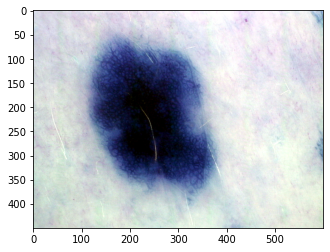

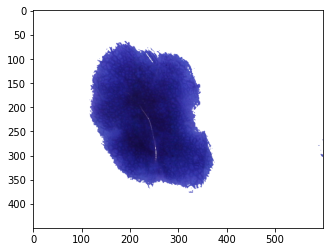

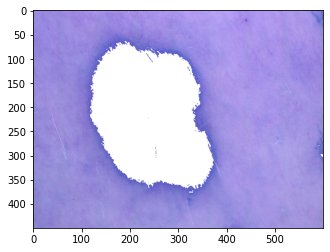

-1

In [18]:
from IPython.core.interactiveshell import removed_co_newlocals
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageChops

def equaliseWhiteBalance(image):
    ''' Return equilised WB of an image '''
    wb = cv2.xphoto.createSimpleWB()                        #Create WB Object
    imgWB = wb.balanceWhite(img)                            #Balance White on image
    r,g,b = cv2.split(imgWB)                                #Get individual r,g,b channels
    r_equ  = cv2.equalizeHist(r)                            #Equalise RED channel
    g_equ  = cv2.equalizeHist(g)                            #Equalise GREEN channel
    b_equ  = cv2.equalizeHist(b)                            #Equalise BLUE channel
    img_equ_WB = cv2.merge([r_equ,g_equ,b_equ])             #Merge equalised channels
    return imgWB

#Read the image
img = cv2.imread('nev07730.jpg')
result = img.copy()


#Get whiteBalance of image
imgWB = equaliseWhiteBalance(img)

#cv2.imshow('img', imgWB)
plt.imshow(imgWB)
plt.show()
cv2.waitKey(0)

# Get gray image
gray = cv2.cvtColor(imgWB,cv2.COLOR_RGB2GRAY)
#cv2.imshow('img', gray)
#plt.imshow(gray)
#plt.show()
#cv2.waitKey(0)

# Perform threshold
_, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
#cv2.imshow('img', thresh)
#plt.imshow(thresh)
#plt.show()
#cv2.waitKey(0)

# Apply mask
result[thresh!=0] = (255,255,255)

#cv2.imshow('img', result)
a= cv2.imwrite('sample5.jpg', result, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
plt.imshow(result)
plt.show()
cv2.waitKey(0)

#img[result > 0] = 255
#removed= (img)*(result)
#a= cv2.imwrite('sample1.jpg', removed, [int(cv2.IMWRITE_JPEG_QUALITY), 90])
removed = cv2.multiply(img, (255 - result))
removed2 = cv2.multiply(img, removed)
removed3 = cv2.add(img, removed2)
plt.imshow(removed3)
plt.show()
cv2.waitKey(0)

